#CREDIT CLASSIFICATION MODEL

ABC Bank wants to identify and understand their customers better to determine the appropriate credit amount to be offered based on multiple factors. The bank possesses a vast dataset containing customer information and other relevant parameters. The bank aims to develop a robust model that can accurately group customer based on their creditworthiness. This will enable the bank to make informed decisions about the credit amount to be extended to each customer group, which can help mitigate risk, ensure responsible lending practices, and optimize loan portfolio management. Additionally, the model can assist the bank in identifying potential high-value customers, tailoring credit offers based on risk profiles, and complying with regulatory requirements.

You have been given a percept of this dataset and the problem at hand is to create a reliable model that can effectively categorize customers into three groups based on various factors, enabling the bank to make data-driven decisions for credit lending and risk management.

The data given is of credit records of individuals with certain attributes. Please go through following to understand the variables involved:

a. serial number : unique identification key

b. account_info : Categorized details of existing accounts of the individuals. The balance of money in account provided is stated by this variable

c. duration_month : Duration in months for which the credit is existing

d. credit_history : This categorical variable signifies the credit history of the individual who has taken the loan

e. purpose: This variable signifies why the loan was taken

f. savings_account: This variable signifies details of the amount present in savings account of the individual:

g. employment_st: Categorical variable that signifies the employment status of everyone who has been alloted loans

h. poi: This numerical variable signifies what percentage of disposable income is spent on loan interest amount.

i. personal_status: This categorical variable signifies the personal status of the individual

j. guarantors: Categorical variable which signifies if any other individual is involved with an individual loan case

k. resident_since: Numerical variable that signifies for how many years the applicant has been a resident

l. property_type: This qualitative variable defines the property holding information of the individual

m. age: Numerical variable that signifies age in number of years

n. installment_type: This variable signifies other installment types taken

o. housing_type: This is a categorical variable that signifies which type of housing does a applicant have.

p. credits_no: Numerical variable for number of credits taken by the person

q. job_type: Signifies the employment status of the person

r. liables: Signifies number of persons dependent on the applicant

s. telephone: Signifies if the individual has a telephone or no

t. foreigner: Signifies if the individual is a foreigner or not (considering the country of residence of the bank)


# Approach to the prediction
* 1.Import all libaray
* 2.Load and audit the data
* 3.Data prepration and Data Transformation
    * 1.Dealing with missing value
    * 2.Inconsistent value: Replace all transformation with consistent values
    * 3.Dealing With Outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression:Not a regressiion
        * 2.Classification
            * 1.Apply different model to find the best accuracy

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

#Importing the dataset

In [ ]:
train=pd.read_csv("/content/ABC_Bank_train_data.csv")
train.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [ ]:
test=pd.read_csv("/content/ABC_Bank_test_data.csv")
test.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_account   800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [ ]:
train.isnull().sum()


serial number        0
account_info         0
duration_month       0
credit_history       0
purpose              0
savings_account      0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [ ]:
train.describe()

,serial number,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


#Data preprocessing


In [ ]:
def data_prep(data):
     data['employment_st']=np.where(data['employment_st'].isna(),data['employment_st'].mode(dropna=True),data['employment_st'])
     data['gurantors']=np.where(data['gurantors'].isna(),data['gurantors'].mode(dropna=True),data['gurantors'])
     data['housing_type']=np.where(data['housing_type'].isna(),data['housing_type'].mode(dropna=True),data['housing_type'])
     data['poi']=np.where(data['poi'].isna(),data['poi'].median(skipna=True),data['poi'])
     data['age']=np.where(data['age'].isna(),data['age'].median(skipna=True),data['age'])


In [ ]:
data_prep(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_account   800 non-null    object 
 6   employment_st     800 non-null    object 
 7   poi               800 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         800 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               800 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      800 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

#Removing unnecessary columns

In [ ]:
train.drop('serial number',axis=1,inplace=True)

In [ ]:
train.skew()

<ipython-input-136-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


duration_month    1.149158
poi              -0.506821
resident_since   -0.277252
age               1.065179
credits_no        1.267630
liables           1.991872
Group_no         -0.123486
dtype: float64

#Exploratory Data Analysis

> Indented block



2    353
3    254
1    193
Name: Group_no, dtype: int64

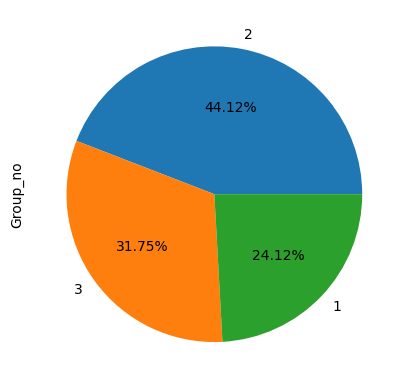

In [ ]:
train['Group_no'].value_counts().plot(kind='pie',autopct='%1.2f%%')
train['Group_no'].value_counts()

credit_history  Group_no
A30             1           0.515152
                2           0.303030
                3           0.181818
A31             2           0.459459
                3           0.324324
                1           0.216216
A32             2           0.469340
                3           0.346698
                1           0.183962
A33             1           0.450704
                2           0.366197
                3           0.183099
A34             2           0.429787
                3           0.323404
                1           0.246809
Name: Group_no, dtype: float64


<Axes: xlabel='credit_history', ylabel='Group_no'>

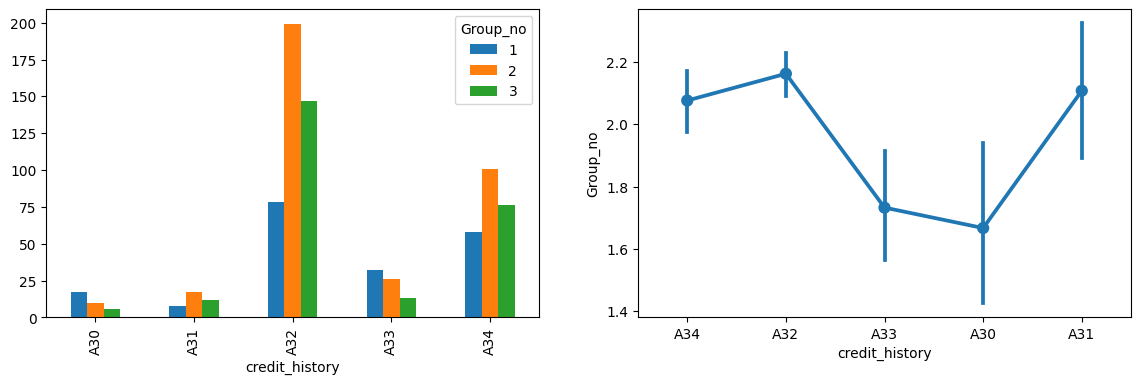

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(train.credit_history,train.Group_no).plot(kind="bar",ax=ax1)
s = train.groupby(['credit_history'])['Group_no'].value_counts(normalize=True)
print(s)
sns.pointplot(
    x="credit_history",
    y="Group_no",
    data=train,ax=ax2)

account_info  Group_no
A11           2           0.444976
              3           0.320574
              1           0.234450
A12           2           0.389381
              1           0.309735
              3           0.300885
A13           3           0.509091
              2           0.400000
              1           0.090909
A14           2           0.483871
              3           0.293548
              1           0.222581
Name: Group_no, dtype: float64


<Axes: xlabel='account_info', ylabel='Group_no'>

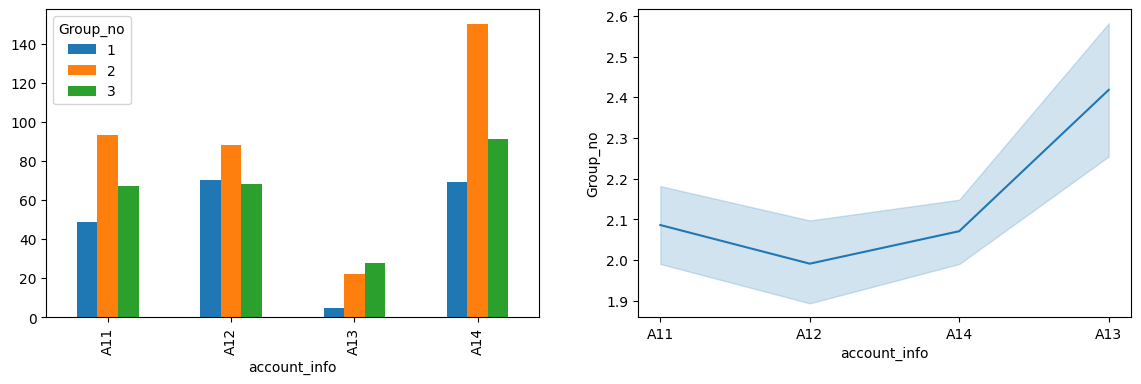

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(train.account_info,train.Group_no).plot(kind="bar",ax=ax1)
s = train.groupby(['account_info'])['Group_no'].value_counts(normalize=True)
print(s)
sns.lineplot(
    x="account_info",
    y="Group_no",
    data=train,ax=ax2)

purpose  Group_no
A40      3           0.461957
         2           0.336957
         1           0.201087
A41      1           0.530864
         2           0.407407
         3           0.061728
A410     1           0.600000
         2           0.200000
         3           0.200000
A42      2           0.625000
         1           0.187500
         3           0.187500
A43      2           0.488789
         3           0.363229
         1           0.147982
A44      3           0.888889
         2           0.111111
A45      2           0.421053
         3           0.368421
         1           0.210526
A46      3           0.377778
         2           0.355556
         1           0.266667
A48      3           0.875000
         2           0.125000
A49      1           0.402597
         2           0.402597
         3           0.194805
Name: Group_no, dtype: float64


<Axes: xlabel='purpose', ylabel='Group_no'>

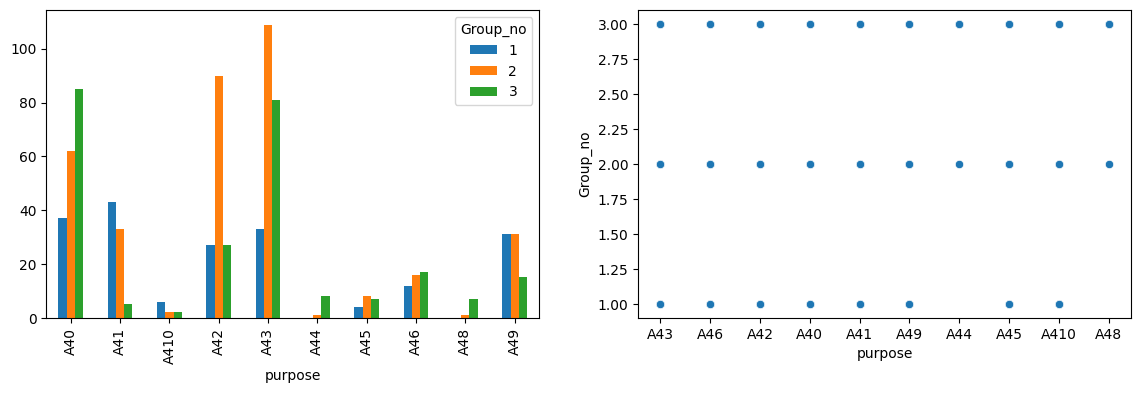

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(train.purpose,train.Group_no).plot(kind="bar",ax=ax1)
s = train.groupby(['purpose'])['Group_no'].value_counts(normalize=True)
print(s)
sns.scatterplot(
    x="purpose",
    y="Group_no",
    data=train,ax=ax2)

savings_account  Group_no
A61              2           0.449580
                 3           0.313025
                 1           0.237395
A62              2           0.404494
                 3           0.303371
                 1           0.292135
A63              2           0.490196
                 3           0.431373
                 1           0.078431
A64              2           0.547619
                 3           0.333333
                 1           0.119048
A65              2           0.387324
                 1           0.316901
                 3           0.295775
Name: Group_no, dtype: float64


<Axes: xlabel='savings_account', ylabel='Group_no'>

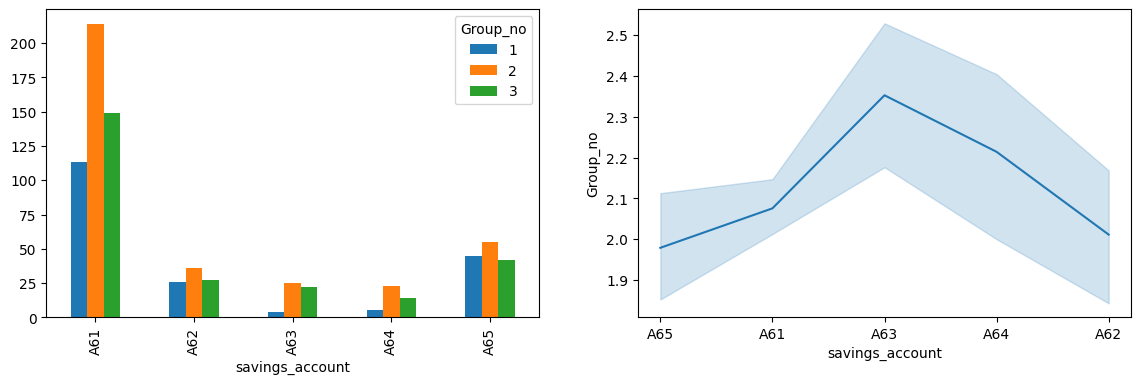

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(train.savings_account,train.Group_no).plot(kind="bar",ax=ax1)
s = train.groupby(['savings_account'])['Group_no'].value_counts(normalize=True)
print(s)
sns.lineplot(
    x="savings_account",
    y="Group_no",
    data=train,ax=ax2)

personal_status  Group_no
A91              2           0.526316
                 3           0.263158
                 1           0.210526
A92              2           0.423529
                 3           0.388235
                 1           0.188235
A93              2           0.462243
                 1           0.292906
                 3           0.244851
A94              3           0.542857
                 2           0.328571
                 1           0.128571
Name: Group_no, dtype: float64


<Axes: xlabel='personal_status', ylabel='Group_no'>

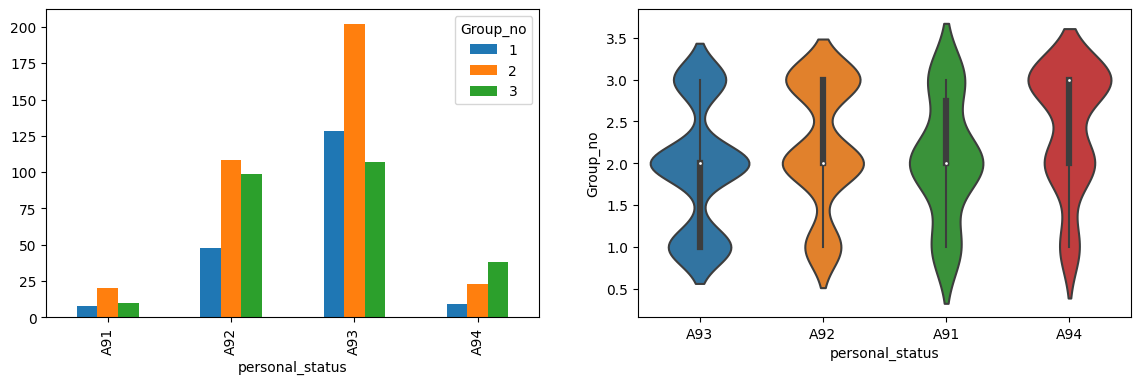

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(train.personal_status,train.Group_no).plot(kind="bar",ax=ax1)
s = train.groupby(['personal_status'])['Group_no'].value_counts(normalize=True)
print(s)
sns.violinplot(
    x="personal_status",
    y="Group_no",
    data=train,ax=ax2)

job_type  Group_no
A171      3           0.588235
          2           0.294118
          1           0.117647
A172      3           0.478261
          2           0.372671
          1           0.149068
A173      2           0.493042
          3           0.306163
          1           0.200795
A174      1           0.554622
          2           0.336134
          3           0.109244
Name: Group_no, dtype: float64


<Axes: xlabel='job_type', ylabel='Group_no'>

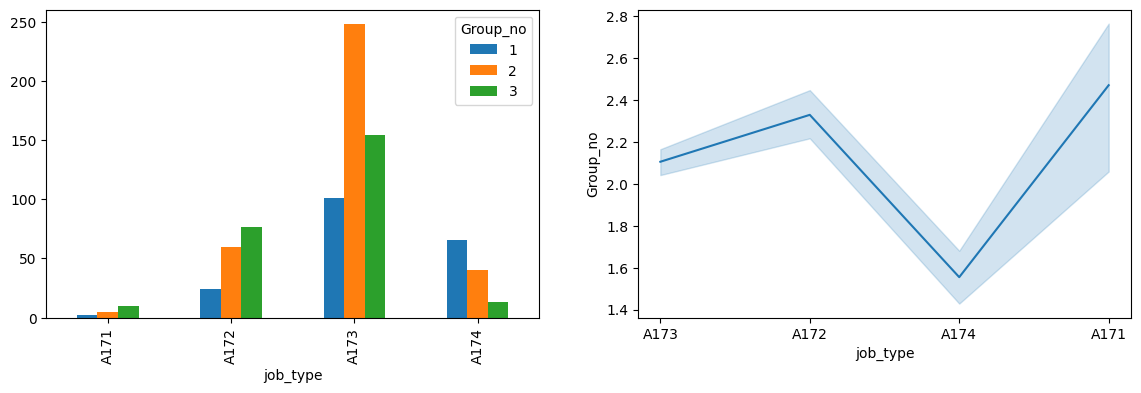

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(train.job_type,train.Group_no).plot(kind="bar",ax=ax1)
s = train.groupby(['job_type'])['Group_no'].value_counts(normalize=True)
print(s)
sns.lineplot(
    x="job_type",
    y="Group_no",
    data=train,ax=ax2)

foreigner  Group_no
A201       2           0.445019
           3           0.307891
           1           0.247089
A202       3           0.592593
           2           0.333333
           1           0.074074
Name: Group_no, dtype: float64


<Axes: xlabel='foreigner', ylabel='Group_no'>

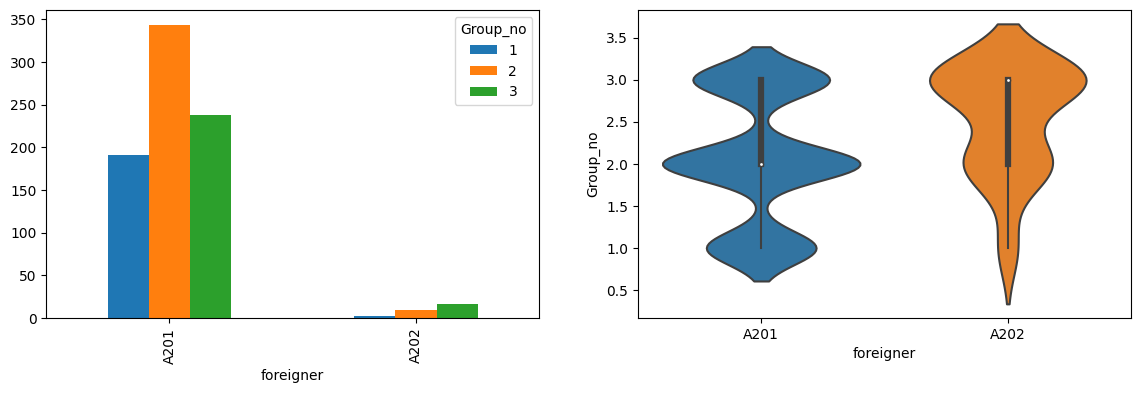

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(train.foreigner,train.Group_no).plot(kind="bar",ax=ax1)
s = train.groupby(['foreigner'])['Group_no'].value_counts(normalize=True)
print(s)
sns.violinplot(
    x="foreigner",
    y="Group_no",
    data=train,ax=ax2)

array([[<Axes: title={'center': 'duration_month'}>,
        <Axes: title={'center': 'poi'}>,
        <Axes: title={'center': 'resident_since'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'credits_no'}>,
        <Axes: title={'center': 'liables'}>],
       [<Axes: title={'center': 'Group_no'}>, <Axes: >, <Axes: >]],
      dtype=object)

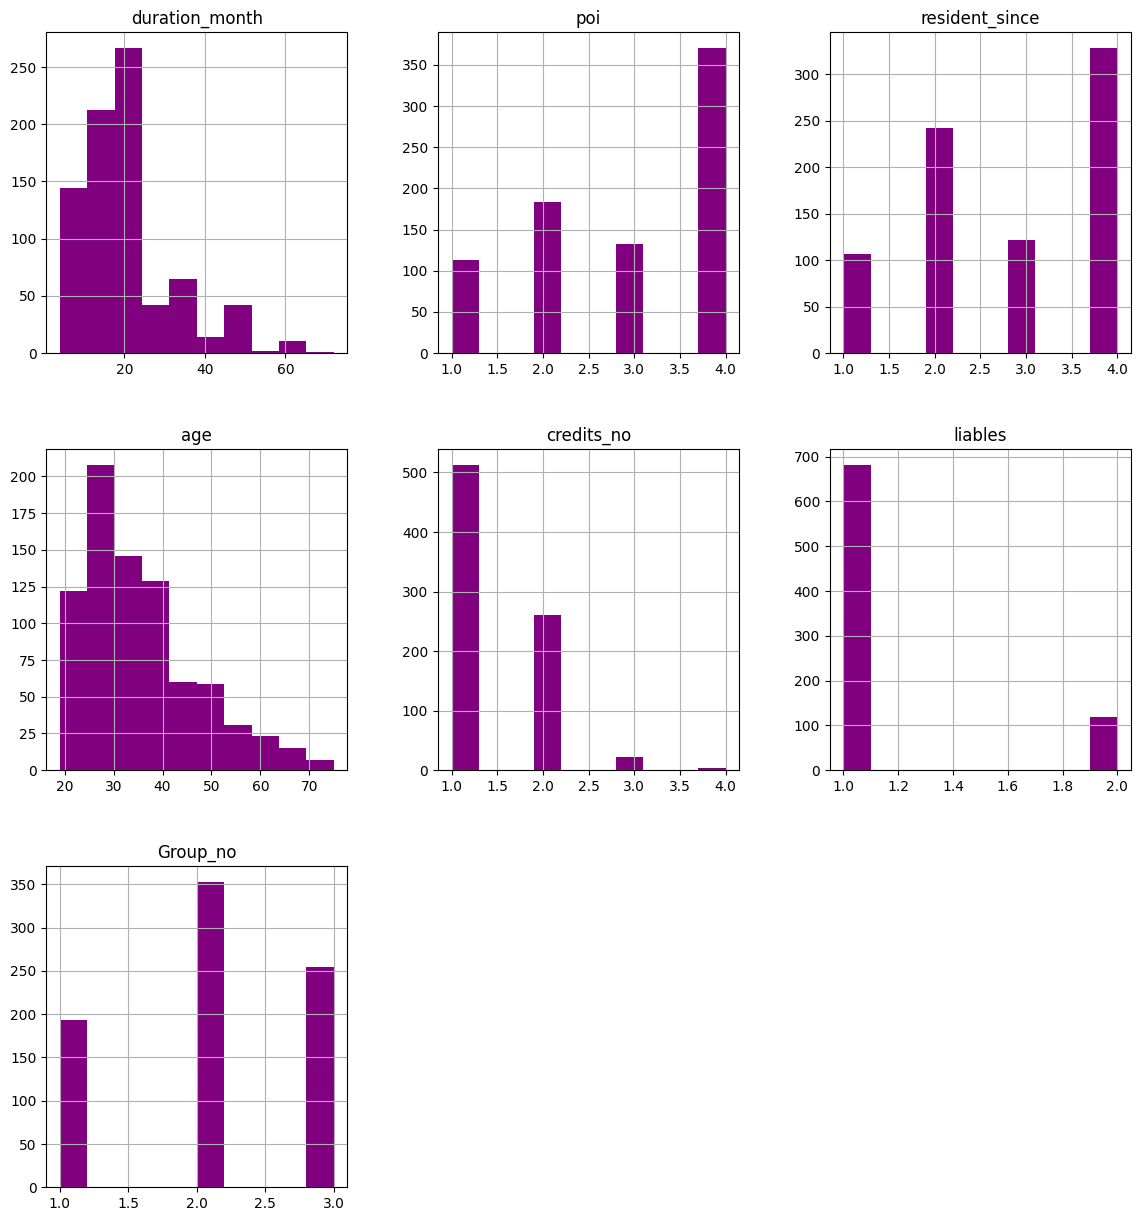

In [ ]:
train.hist(figsize=(14,15),color='purple')

In [ ]:
 train.corr()

<ipython-input-146-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,duration_month,poi,resident_since,age,credits_no,liables,Group_no
duration_month,1.000000,0.076043,0.030762,-0.044905,-0.013814,-0.023749,-0.588725
poi,0.076043,1.000000,0.039126,0.074168,0.014598,-0.066821,0.259414
resident_since,0.030762,0.039126,1.000000,0.250698,0.072087,0.050136,-0.026316
age,-0.044905,0.074168,0.250698,1.000000,0.138133,0.129216,-0.004424
credits_no,-0.013814,0.014598,0.072087,0.138133,1.000000,0.081980,-0.056597
liables,-0.023749,-0.066821,0.050136,0.129216,0.081980,1.000000,-0.009469
Group_no,-0.588725,0.259414,-0.026316,-0.004424,-0.056597,-0.009469,1.000000


<ipython-input-147-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

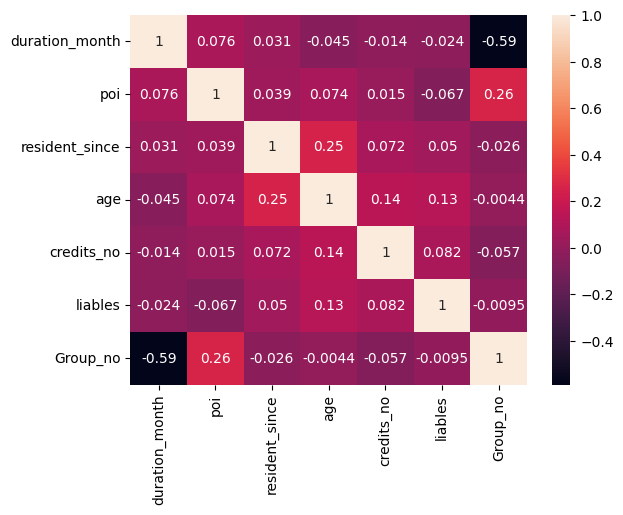

In [ ]:
sns.heatmap(train.corr(),annot=True)

#Encoding The values

In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=="object":
      data[i]=le.fit_transform(data[i])
  return data

In [ ]:
encode(train)

,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,0,6,4,4,4,4,4.0,2,0,4,0,67.0,2,1,2,2,1,1,0,3
1,1,48,2,4,0,2,2.0,1,0,2,0,22.0,2,1,1,2,1,0,0,1
2,3,12,4,7,0,3,2.0,2,0,3,0,49.0,2,1,1,1,2,0,0,2
3,0,42,2,3,0,3,2.0,2,2,4,1,45.0,2,2,1,2,2,0,0,1
4,0,24,3,0,0,2,3.0,2,0,4,3,53.0,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3,9,2,3,1,1,2.0,1,0,4,1,22.0,2,0,1,2,1,0,0,2
796,0,18,2,1,4,4,1.0,2,0,4,1,51.0,2,2,1,2,2,1,0,1
797,3,12,4,3,0,1,2.0,1,0,4,1,22.0,2,0,2,1,1,0,0,3
798,3,24,3,0,4,4,4.0,3,0,4,2,54.0,2,1,2,2,1,1,0,3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      800 non-null    int64  
 1   duration_month    800 non-null    int64  
 2   credit_history    800 non-null    int64  
 3   purpose           800 non-null    int64  
 4   savings_account   800 non-null    int64  
 5   employment_st     800 non-null    int64  
 6   poi               800 non-null    float64
 7   personal_status   800 non-null    int64  
 8   gurantors         800 non-null    int64  
 9   resident_since    800 non-null    int64  
 10  property_type     800 non-null    int64  
 11  age               800 non-null    float64
 12  installment_type  800 non-null    int64  
 13  housing_type      800 non-null    int64  
 14  credits_no        800 non-null    int64  
 15  job_type          800 non-null    int64  
 16  liables           800 non-null    int64  
 1

#Train test split

In [ ]:
 x=train.drop(['Group_no'],axis=1)
 y=train['Group_no']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=162)

#logistic regression

In [ ]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr=lr.predict(x_train)
preds_ytest_lr=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)
acc_report(y_test,preds_ytest_lr)
print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
acc_report(y_train,preds_ytrain_lr)

accuracy:: 0.65
[[26 13  0]
 [ 9 51 10]
 [ 2 22 27]]
              precision    recall  f1-score   support

           1       0.70      0.67      0.68        39
           2       0.59      0.73      0.65        70
           3       0.73      0.53      0.61        51

    accuracy                           0.65       160
   macro avg       0.68      0.64      0.65       160
weighted avg       0.66      0.65      0.65       160

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
accuracy:: 0.66
[[ 96  55   3]
 [ 32 193  58]
 [  1  69 133]]
              precision    recall  f1-score   support

           1       0.74      0.62      0.68       154
           2       0.61      0.68      0.64       283
           3       0.69      0.66      0.67       203

    accuracy                           0.66       640
   macro avg       0.68      0.65      0.66       640
weighted avg       0.67      0.66      0.66       640



#Decision tree classifier

In [ ]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=4)
dtc.fit(x_train,y_train)
preds_ytrain_dtc=dtc.predict(x_train)
preds_ytest_dtc=dtc.predict(x_test)
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 0.74
[[112  44   3]
 [ 23 207  48]
 [  1  50 152]]
              precision    recall  f1-score   support

           1       0.82      0.70      0.76       159
           2       0.69      0.74      0.72       278
           3       0.75      0.75      0.75       203

    accuracy                           0.74       640
   macro avg       0.75      0.73      0.74       640
weighted avg       0.74      0.74      0.74       640

accuracy:: 0.57
[[21 13  0]
 [14 41 20]
 [ 2 19 30]]
              precision    recall  f1-score   support

           1       0.57      0.62      0.59        34
           2       0.56      0.55      0.55        75
           3       0.60      0.59      0.59        51

    accuracy                           0.57       160
   macro avg       0.58      0.58      0.58       160
weighted avg       0.58      0.57      0.57       160



#Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(verbose=1)
rf.fit(x_train,y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
acc_report(y_train,preds_rf_train)

accuracy:: 1.0
[[159   0   0]
 [  0 278   0]
 [  0   0 203]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       278
           3       1.00      1.00      1.00       203

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640



In [ ]:
acc_report(y_test,preds_rf_test)

accuracy:: 0.61
[[21 13  0]
 [10 45 20]
 [ 0 20 31]]
              precision    recall  f1-score   support

           1       0.68      0.62      0.65        34
           2       0.58      0.60      0.59        75
           3       0.61      0.61      0.61        51

    accuracy                           0.61       160
   macro avg       0.62      0.61      0.61       160
weighted avg       0.61      0.61      0.61       160



#GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 0.92
[[145  14   0]
 [  6 259  13]
 [  0  18 185]]
              precision    recall  f1-score   support

           1       0.96      0.91      0.94       159
           2       0.89      0.93      0.91       278
           3       0.93      0.91      0.92       203

    accuracy                           0.92       640
   macro avg       0.93      0.92      0.92       640
weighted avg       0.92      0.92      0.92       640

accuracy:: 0.62
[[20 13  1]
 [13 46 16]
 [ 0 18 33]]
              precision    recall  f1-score   support

           1       0.61      0.59      0.60        34
           2       0.60      0.61      0.61        75
           3       0.66      0.65      0.65        51

    accuracy                           0.62       160
   macro avg       0.62      0.62      0.62       160
weighted avg       0.62      0.62      0.62       160



# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train,y_train)
preds_ytrain_knn=knn.predict(x_train)
preds_ytest_knn=knn.predict(x_test)
acc_report(y_train,preds_ytrain_knn)

accuracy:: 0.63
[[ 81  64  14]
 [ 28 195  55]
 [  1  73 129]]
              precision    recall  f1-score   support

           1       0.74      0.51      0.60       159
           2       0.59      0.70      0.64       278
           3       0.65      0.64      0.64       203

    accuracy                           0.63       640
   macro avg       0.66      0.62      0.63       640
weighted avg       0.64      0.63      0.63       640



In [ ]:
acc_report(y_test,preds_ytest_knn)

accuracy:: 0.56
[[18 15  1]
 [ 9 41 25]
 [ 0 21 30]]
              precision    recall  f1-score   support

           1       0.67      0.53      0.59        34
           2       0.53      0.55      0.54        75
           3       0.54      0.59      0.56        51

    accuracy                           0.56       160
   macro avg       0.58      0.55      0.56       160
weighted avg       0.56      0.56      0.56       160



#Adaboost Classifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.9623)
ada.fit(x_train,y_train)
preds_ada_train=ada.predict(x_train)
preds_ada_test=ada.predict(x_test)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 0.69
[[116  40   3]
 [ 36 177  65]
 [  0  56 147]]
              precision    recall  f1-score   support

           1       0.76      0.73      0.75       159
           2       0.65      0.64      0.64       278
           3       0.68      0.72      0.70       203

    accuracy                           0.69       640
   macro avg       0.70      0.70      0.70       640
weighted avg       0.69      0.69      0.69       640

accuracy:: 0.6
[[22 12  0]
 [15 41 19]
 [ 0 18 33]]
              precision    recall  f1-score   support

           1       0.59      0.65      0.62        34
           2       0.58      0.55      0.56        75
           3       0.63      0.65      0.64        51

    accuracy                           0.60       160
   macro avg       0.60      0.61      0.61       160
weighted avg       0.60      0.60      0.60       160



#After standard scaling

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

#Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)

In [ ]:
acc_report(y_train,preds_ytrain_lr)
acc_report(y_test,preds_ytest_lr)

accuracy:: 0.68
[[114  45   3]
 [ 26 195  56]
 [  1  72 128]]
              precision    recall  f1-score   support

           1       0.81      0.70      0.75       162
           2       0.62      0.70      0.66       277
           3       0.68      0.64      0.66       201

    accuracy                           0.68       640
   macro avg       0.71      0.68      0.69       640
weighted avg       0.69      0.68      0.68       640

accuracy:: 0.64
[[20 11  0]
 [11 52 13]
 [ 1 22 30]]
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        31
           2       0.61      0.68      0.65        76
           3       0.70      0.57      0.62        53

    accuracy                           0.64       160
   macro avg       0.64      0.63      0.64       160
weighted avg       0.64      0.64      0.64       160



#Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier(max_depth=2,min_samples_split=4)
dtc.fit(x_train_scal,y_train)
preds_ytrain_dtc=dtc.predict(x_train_scal)
preds_ytest_dtc=dtc.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 0.47
[[  0 128  31]
 [  0 232  46]
 [  0 136  67]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       159
           2       0.47      0.83      0.60       278
           3       0.47      0.33      0.39       203

    accuracy                           0.47       640
   macro avg       0.31      0.39      0.33       640
weighted avg       0.35      0.47      0.38       640

accuracy:: 0.45
[[ 0 28  6]
 [ 0 58 17]
 [ 0 37 14]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.47      0.77      0.59        75
           3       0.38      0.27      0.32        51

    accuracy                           0.45       160
   macro avg       0.28      0.35      0.30       160
weighted avg       0.34      0.45      0.38       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

#RandomForest Classifier

In [ ]:
rf= RandomForestClassifier(n_estimators=200,max_depth=60 ,verbose=1)
rf.fit(x_train_scal,y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [ ]:

acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[153   0   0]
 [  0 286   0]
 [  0   0 201]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00       201

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640

accuracy:: 0.68
[[29 10  1]
 [ 3 49 15]
 [ 0 23 30]]
              precision    recall  f1-score   support

           1       0.91      0.72      0.81        40
           2       0.60      0.73      0.66        67
           3       0.65      0.57      0.61        53

    accuracy                           0.68       160
   macro avg       0.72      0.67      0.69       160
weighted avg       0.69      0.68      0.68       160



#Gradient boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train_scal,y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 0.91
[[142  19   1]
 [  6 258  13]
 [  0  20 181]]
              precision    recall  f1-score   support

           1       0.96      0.88      0.92       162
           2       0.87      0.93      0.90       277
           3       0.93      0.90      0.91       201

    accuracy                           0.91       640
   macro avg       0.92      0.90      0.91       640
weighted avg       0.91      0.91      0.91       640

accuracy:: 0.66
[[17 14  0]
 [ 8 56 12]
 [ 1 19 33]]
              precision    recall  f1-score   support

           1       0.65      0.55      0.60        31
           2       0.63      0.74      0.68        76
           3       0.73      0.62      0.67        53

    accuracy                           0.66       160
   macro avg       0.67      0.64      0.65       160
weighted avg       0.67      0.66      0.66       160



#KNeighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train_scal,y_train)
preds_ytrain_knn=knn.predict(x_train_scal)
preds_ytest_knn=knn.predict(x_test_scal)
acc_report(y_train,preds_ytrain_knn)
acc_report(y_test,preds_ytest_knn)

accuracy:: 0.6
[[ 61  97   4]
 [ 14 220  43]
 [  1  98 102]]
              precision    recall  f1-score   support

           1       0.80      0.38      0.51       162
           2       0.53      0.79      0.64       277
           3       0.68      0.51      0.58       201

    accuracy                           0.60       640
   macro avg       0.67      0.56      0.58       640
weighted avg       0.65      0.60      0.59       640

accuracy:: 0.58
[[ 9 22  0]
 [ 3 60 13]
 [ 1 28 24]]
              precision    recall  f1-score   support

           1       0.69      0.29      0.41        31
           2       0.55      0.79      0.65        76
           3       0.65      0.45      0.53        53

    accuracy                           0.58       160
   macro avg       0.63      0.51      0.53       160
weighted avg       0.61      0.58      0.56       160



#Ada boost Classifier

In [ ]:

ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.9623)
ada.fit(x_train_scal,y_train)
preds_ada_train=ada.predict(x_train_scal)
preds_ada_test=ada.predict(x_test_scal)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 0.68
[[114  44   4]
 [ 40 182  55]
 [  2  60 139]]
              precision    recall  f1-score   support

           1       0.73      0.70      0.72       162
           2       0.64      0.66      0.65       277
           3       0.70      0.69      0.70       201

    accuracy                           0.68       640
   macro avg       0.69      0.68      0.69       640
weighted avg       0.68      0.68      0.68       640

accuracy:: 0.68
[[17 13  1]
 [ 9 55 12]
 [ 0 17 36]]
              precision    recall  f1-score   support

           1       0.65      0.55      0.60        31
           2       0.65      0.72      0.68        76
           3       0.73      0.68      0.71        53

    accuracy                           0.68       160
   macro avg       0.68      0.65      0.66       160
weighted avg       0.68      0.68      0.67       160



#support vector classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=3)
svc.fit(x_train_scal,y_train)
svc_preds_train=svc.predict(x_train_scal)
svc_preds_test=svc.predict(x_test_scal)

In [ ]:
acc_report(y_train,svc_preds_train)
acc_report(y_test,svc_preds_test)

accuracy:: 0.79
[[109  53   0]
 [  1 274   2]
 [  0  79 122]]
              precision    recall  f1-score   support

           1       0.99      0.67      0.80       162
           2       0.67      0.99      0.80       277
           3       0.98      0.61      0.75       201

    accuracy                           0.79       640
   macro avg       0.88      0.76      0.78       640
weighted avg       0.85      0.79      0.79       640

accuracy:: 0.57
[[13 18  0]
 [ 5 65  6]
 [ 2 37 14]]
              precision    recall  f1-score   support

           1       0.65      0.42      0.51        31
           2       0.54      0.86      0.66        76
           3       0.70      0.26      0.38        53

    accuracy                           0.57       160
   macro avg       0.63      0.51      0.52       160
weighted avg       0.62      0.57      0.54       160



#GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
gb_preds_train=gb.predict(x_train)
gb_preds_test=gb.predict(x_test)
acc_report(y_train,gb_preds_train)
acc_report(y_test,gb_preds_test)

accuracy:: 0.63
[[116  40   6]
 [ 60 165  52]
 [ 17  62 122]]
              precision    recall  f1-score   support

           1       0.60      0.72      0.65       162
           2       0.62      0.60      0.61       277
           3       0.68      0.61      0.64       201

    accuracy                           0.63       640
   macro avg       0.63      0.64      0.63       640
weighted avg       0.63      0.63      0.63       640

accuracy:: 0.58
[[20 11  0]
 [16 46 14]
 [ 5 21 27]]
              precision    recall  f1-score   support

           1       0.49      0.65      0.56        31
           2       0.59      0.61      0.60        76
           3       0.66      0.51      0.57        53

    accuracy                           0.58       160
   macro avg       0.58      0.59      0.58       160
weighted avg       0.59      0.58      0.58       160



#After SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smp=SMOTE()
x_smote,y_smote=smp.fit_resample(x,y)


In [ ]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=162)


#Logistic regression

In [ ]:
lr.fit(x_sm_train,y_sm_train)
#Training the model
preds_ytrain_lr=lr.predict(x_sm_train)
preds_ytest_lr=lr.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_lr)
acc_report(y_sm_test,preds_ytest_lr)

accuracy:: 0.66
[[210  58   6]
 [ 67 139  77]
 [  5  74 211]]
              precision    recall  f1-score   support

           1       0.74      0.77      0.76       274
           2       0.51      0.49      0.50       283
           3       0.72      0.73      0.72       290

    accuracy                           0.66       847
   macro avg       0.66      0.66      0.66       847
weighted avg       0.66      0.66      0.66       847

accuracy:: 0.67
[[57 22  0]
 [13 38 19]
 [ 0 17 46]]
              precision    recall  f1-score   support

           1       0.81      0.72      0.77        79
           2       0.49      0.54      0.52        70
           3       0.71      0.73      0.72        63

    accuracy                           0.67       212
   macro avg       0.67      0.66      0.67       212
weighted avg       0.68      0.67      0.67       212



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:: 0.67
[[52 16  2]
 [24 46 12]
 [ 2 14 44]]
              precision    recall  f1-score   support

           1       0.67      0.74      0.70        70
           2       0.61      0.56      0.58        82
           3       0.76      0.73      0.75        60

    accuracy                           0.67       212
   macro avg       0.68      0.68      0.68       212
weighted avg       0.67      0.67      0.67       212



#decision Tree classifier

In [ ]:
dtc.fit(x_sm_train,y_sm_train)
preds_ytrain_dtc=dtc.predict(x_sm_train)
preds_ytest_dtc=dtc.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_dtc)
acc_report(y_sm_test,preds_ytest_dtc)

accuracy:: 0.62
[[165  78  31]
 [ 47 127 109]
 [  2  55 233]]
              precision    recall  f1-score   support

           1       0.77      0.60      0.68       274
           2       0.49      0.45      0.47       283
           3       0.62      0.80      0.70       290

    accuracy                           0.62       847
   macro avg       0.63      0.62      0.62       847
weighted avg       0.63      0.62      0.62       847

accuracy:: 0.58
[[44 28  7]
 [13 29 28]
 [ 0 12 51]]
              precision    recall  f1-score   support

           1       0.77      0.56      0.65        79
           2       0.42      0.41      0.42        70
           3       0.59      0.81      0.68        63

    accuracy                           0.58       212
   macro avg       0.60      0.59      0.58       212
weighted avg       0.60      0.58      0.58       212



#random forest classifier

In [ ]:
rf= RandomForestClassifier(n_estimators=200,max_depth=40 ,verbose=1)
rf.fit(x_sm_train,y_sm_train)
preds_ytrain_rf=rf.predict(x_sm_train)
preds_ytest_rf=rf.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_rf)
acc_report(y_sm_test,preds_ytest_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy:: 1.0
[[274   0   0]
 [  0 283   0]
 [  0   0 290]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       274
           2       1.00      1.00      1.00       283
           3       1.00      1.00      1.00       290

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

accuracy:: 0.79
[[70  8  1]
 [ 7 46 17]
 [ 1 11 51]]
              precision    recall  f1-score   support

           1       0.90      0.89      0.89        79
           2       0.71      0.66      0.68        70
           3       0.74      0.81      0.77        63

    accuracy                           0.79       212
   macro avg       0.78      0.78      0.78       212
weighted avg       0.79      0.79      0.79       212



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


#gradient Boosting

In [ ]:
gb.fit(x_sm_train,y_sm_train)
preds_ytrain_gb=gb.predict(x_sm_train)
preds_ytest_gb=gb.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_gb)
acc_report(y_sm_test,preds_ytest_gb)

accuracy:: 0.62
[[230  27  12]
 [117  97  77]
 [ 36  56 195]]
              precision    recall  f1-score   support

           1       0.60      0.86      0.71       269
           2       0.54      0.33      0.41       291
           3       0.69      0.68      0.68       287

    accuracy                           0.62       847
   macro avg       0.61      0.62      0.60       847
weighted avg       0.61      0.62      0.60       847

accuracy:: 0.67
[[75  7  2]
 [27 21 14]
 [ 9 12 45]]
              precision    recall  f1-score   support

           1       0.68      0.89      0.77        84
           2       0.53      0.34      0.41        62
           3       0.74      0.68      0.71        66

    accuracy                           0.67       212
   macro avg       0.65      0.64      0.63       212
weighted avg       0.65      0.67      0.65       212



#KNN

In [ ]:
knn.fit(x_sm_train,y_sm_train)
preds_ytrain_knn=knn.predict(x_sm_train)
preds_ytest_knn=knn.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_knn)
acc_report(y_sm_test,preds_ytest_knn)

accuracy:: 0.64
[[201  42  26]
 [ 61 131  99]
 [ 16  57 214]]
              precision    recall  f1-score   support

           1       0.72      0.75      0.73       269
           2       0.57      0.45      0.50       291
           3       0.63      0.75      0.68       287

    accuracy                           0.64       847
   macro avg       0.64      0.65      0.64       847
weighted avg       0.64      0.64      0.64       847

accuracy:: 0.68
[[65 12  7]
 [18 24 20]
 [ 3  8 55]]
              precision    recall  f1-score   support

           1       0.76      0.77      0.76        84
           2       0.55      0.39      0.45        62
           3       0.67      0.83      0.74        66

    accuracy                           0.68       212
   macro avg       0.66      0.66      0.65       212
weighted avg       0.67      0.68      0.67       212



#Ada boost classifier

In [ ]:
ada.fit(x_sm_train,y_sm_train)
preds_ytrain_ada=ada.predict(x_sm_train)
preds_ytest_ada=ada.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_ada)
acc_report(y_sm_test,preds_ytest_ada)

accuracy:: 0.7
[[190  75   4]
 [ 40 180  71]
 [  4  56 227]]
              precision    recall  f1-score   support

           1       0.81      0.71      0.76       269
           2       0.58      0.62      0.60       291
           3       0.75      0.79      0.77       287

    accuracy                           0.70       847
   macro avg       0.71      0.71      0.71       847
weighted avg       0.71      0.70      0.71       847

accuracy:: 0.66
[[51 33  0]
 [ 7 43 12]
 [ 1 19 46]]
              precision    recall  f1-score   support

           1       0.86      0.61      0.71        84
           2       0.45      0.69      0.55        62
           3       0.79      0.70      0.74        66

    accuracy                           0.66       212
   macro avg       0.70      0.67      0.67       212
weighted avg       0.72      0.66      0.67       212



#Support Vector Machine

In [ ]:
svc.fit(x_sm_train,y_sm_train)
preds_ytrain_svc=svc.predict(x_sm_train)
preds_ytest_svc=svc.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_svc)
acc_report(y_sm_test,preds_ytest_svc)

accuracy:: 0.59
[[137  97  35]
 [ 34 113 144]
 [  0  39 248]]
              precision    recall  f1-score   support

           1       0.80      0.51      0.62       269
           2       0.45      0.39      0.42       291
           3       0.58      0.86      0.69       287

    accuracy                           0.59       847
   macro avg       0.61      0.59      0.58       847
weighted avg       0.61      0.59      0.58       847

accuracy:: 0.63
[[49 24 11]
 [ 7 24 31]
 [ 1  4 61]]
              precision    recall  f1-score   support

           1       0.86      0.58      0.70        84
           2       0.46      0.39      0.42        62
           3       0.59      0.92      0.72        66

    accuracy                           0.63       212
   macro avg       0.64      0.63      0.61       212
weighted avg       0.66      0.63      0.62       212



#Gaussian NB

In [ ]:
gb=GaussianNB()
gb.fit(x_sm_train,y_sm_train)
preds_ytrain_gb=gb.predict(x_sm_train)
preds_ytest_gb=gb.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_gb)
acc_report(y_sm_test,preds_ytest_gb)

accuracy:: 0.62
[[230  27  12]
 [117  97  77]
 [ 36  56 195]]
              precision    recall  f1-score   support

           1       0.60      0.86      0.71       269
           2       0.54      0.33      0.41       291
           3       0.69      0.68      0.68       287

    accuracy                           0.62       847
   macro avg       0.61      0.62      0.60       847
weighted avg       0.61      0.62      0.60       847

accuracy:: 0.67
[[75  7  2]
 [27 21 14]
 [ 9 12 45]]
              precision    recall  f1-score   support

           1       0.68      0.89      0.77        84
           2       0.53      0.34      0.41        62
           3       0.74      0.68      0.71        66

    accuracy                           0.67       212
   macro avg       0.65      0.64      0.63       212
weighted avg       0.65      0.67      0.65       212



#handling TEST data

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     200 non-null    int64  
 1   account_info      200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_account   200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [ ]:
data_prep(test)

In [ ]:
encode(test)

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,3,24,4,7,0,4,4.0,2,0,4,3,54.0,2,2,2,2,2,0,0
1,2,1,18,4,4,0,4,3.0,1,2,4,0,48.0,0,0,2,1,1,1,0
2,3,0,20,4,3,0,4,1.0,1,0,4,1,24.0,2,1,2,2,1,0,0
3,4,3,12,4,4,4,4,4.0,2,0,4,2,35.0,2,1,2,2,1,0,0
4,5,1,12,2,0,4,0,1.0,1,0,2,0,24.0,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3,12,2,3,0,3,3.0,1,0,4,0,31.0,2,1,1,1,1,0,0
196,197,0,30,2,1,0,2,4.0,0,0,4,1,40.0,2,1,1,3,1,1,0
197,198,3,12,2,4,0,4,4.0,2,0,4,2,38.0,2,1,1,2,1,0,0
198,199,0,45,2,4,0,2,4.0,2,0,4,3,23.0,2,2,1,2,1,1,0


In [ ]:
test.drop('serial number',axis=1,inplace=True)

In [ ]:
preds_ytest_rf = rf.predict(test)
preds_ytest_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


array([2, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3,
       2, 3, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 3, 2,
       1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 3, 1, 3, 2, 3, 2, 3, 1, 2, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1,
       1, 1, 1, 3, 3, 1, 2, 1, 2, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1, 3, 3,
       2, 1, 1, 3, 2, 1, 2, 1, 1, 2, 2, 1, 3, 3, 1, 3, 2, 1, 2, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 3, 2, 2, 1, 2, 1,
       3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2,
       2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 3, 3, 2, 3,
       1, 1])

In [ ]:
output = pd.DataFrame({
    'serial number' : range(1, 201),
    'Group_no':[2, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3,
       2, 3, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 3, 2,
       1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 3, 1, 3, 2, 3, 2, 3, 1, 2, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1,
       1, 1, 1, 3, 3, 1, 2, 1, 2, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1, 3, 3,
       2, 1, 1, 3, 2, 1, 2, 1, 1, 2, 2, 1, 3, 3, 1, 3, 2, 1, 2, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 3, 2, 2, 1, 2, 1,
       3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2,
       2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 3, 3, 2, 3,
       1, 1]
})

output

,serial number,Group_no
0,1,2
1,2,2
2,3,2
3,4,3
4,5,3
...,...,...
195,196,3
196,197,2
197,198,3
198,199,1


In [ ]:
output.to_csv('sample.csv')

#conclusion
gradient boost accuracy

*   train-0.9
*   test-0.71

after scaling- ada boosting


*   train-0.68
*   test-0.67



                     
smote-random forest  accuracy

*   train-1.0
*   test-0.79

ada boost classifier accuracy

*   train-0.71
*   test-0.71

#The best model is random forest with accuracy train -1.0 || test-0.79



                     
